## Optional Assignment: Comparing Efficiency and Accuracy of DFT vs FFT in Python

### Goals:

- Understand the difference between Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT).
- Implement DFT and FFT manually.
- Use built-in FFT from NumPy.
- Compare execution time and accuracy of each method.



### 1. Numerical Implementation

#### Generate Sample Data

We’ll create a simple composite sine wave signal by combining two sinusoidal components of different frequencies. This simulates a basic real-world signal that has multiple frequency components, which is ideal for testing Fourier transform algorithms.

```python
import numpy as np
import matplotlib.pyplot as plt
import time

# Sampling parameters
N = 512          # Number of samples
Fs = 1024        # Sampling frequency (Hz)
T = 1 / Fs       # Sampling interval
t = np.arange(N) * T

# Composite signal: 50Hz + 120Hz
f1, f2 = 50, 120
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Plot the signal
plt.plot(t[:100], signal[:100])
plt.title("Sample Signal (First 100 samples)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
```



#### Manual DFT Implementation

In this section, you have a manual implementation of the Discrete Fourier Transform (DFT) from scratch using Python.

The DFT is a mathematical technique used to transform a discrete signal from the time domain into the frequency domain, revealing the different frequency components present in the signal.

Although libraries like NumPy provide fast and optimized FFT functions, implementing the DFT manually helps you understand how the transformation works under the hood.

```python
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X
```



#### Manual FFT Implementation (Cooley-Tukey, radix-2)

In this section, you have an implementation of the Fast Fourier Transform (FFT) using the classic Cooley-Tukey radix-2 recursive algorithm.

While the DFT has a time complexity of $O(N^2)$, the FFT reduces this drastically to $O(N \log N)$ by reusing computations and exploiting the symmetry of the complex exponentials. This makes FFT the standard algorithm for computing the Fourier Transform in practice.

```python
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    if N % 2 != 0:
        raise ValueError("N must be a power of 2")
    
    even = fft(x[::2])
    odd = fft(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + \
           [even[k] - T[k] for k in range(N // 2)]
```


### 2. Benchmarking and Accuracy Comparison

In this section, you'll benchmark the **execution time** of the different Fourier transform methods and compare their **accuracy**.

To achieve this, we’ll run the following transformations on the signal:

* **Manual DFT**
* **Manual FFT**
* **NumPy’s built-in FFT** (`np.fft.fft`)

You’ll use Python’s **`time.time()`** function to measure the time it takes for each method to process the signal. This will give you insight into the relative **speed** of each approach. Since **NumPy’s FFT** is highly optimized, you should expect it to be the fastest.

Next, you’ll compare the **accuracy** of the methods by computing the **Mean Squared Error (MSE)** between the results of your manual implementations (DFT and FFT) and the results from NumPy’s FFT. The MSE measures how far off your implementations are from the reference solution, giving you a sense of how well your custom algorithms work.



```python
def benchmark(method, x, label):
    start = time.time()
    result = method(x)
    end = time.time()
    print(f"{label} took {(end - start)*1000:.2f} ms")
    return np.array(result)

# Benchmark all methods
X_dft = benchmark(dft, signal, "Manual DFT")
X_fft = benchmark(fft, signal, "Manual FFT")
X_np_fft = benchmark(np.fft.fft, signal, "NumPy FFT")
```


### 3. Visualizing Frequency Spectrum

In this part, we’ll visualize the frequency spectrum of the signal after applying the DFT, FFT, and NumPy FFT.

The frequency spectrum reveals the magnitude of each frequency component in the signal. By plotting this, you can visually inspect how well each method identifies the underlying frequencies in the signal,

```python
def plot_spectrum(X, label):
    N = len(X)
    f = np.fft.fftfreq(N, d=1/Fs)
    plt.plot(f[:N//2], np.abs(X[:N//2]), label=label)

plt.figure(figsize=(10, 6))
plot_spectrum(X_dft, "Manual DFT")
plot_spectrum(X_fft, "Manual FFT")
plot_spectrum(X_np_fft, "NumPy FFT")
plt.title("Magnitude Spectrum Comparison")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()
```


### 4. Accuracy Analysis

In this part, we will perform a quantitative analysis of the accuracy of the DFT and FFT implementations by computing the Mean Squared Error (MSE) between the results of the manual methods and NumPy’s highly optimized FFT function.

The MSE is a common measure for comparing how similar two sets of data are. It calculates the average of the squared differences between the corresponding elements in two signals. A lower MSE indicates higher similarity (i.e., better accuracy).

```python
def mean_squared_error(a, b):
    return np.mean(np.abs(a - b) ** 2)

print(f"MSE (DFT vs NumPy FFT): {mean_squared_error(X_dft, X_np_fft):.4e}")
print(f"MSE (FFT vs NumPy FFT): {mean_squared_error(X_fft, X_np_fft):.4e}")
```


### 5. Log Time for Increasing N

 Here you'll explore how the execution time of the DFT, FFT, and NumPy FFT changes as the signal size ($N$) increases. This helps illustrate how the computational complexity of each method affects performance for larger datasets.

 This part will help you observe the scalability of the algorithms. As the signal size increases, the differences in speed between DFT and FFT will become more pronounced, highlighting the importance of using FFT for large datasets.

```python
sizes = [64, 128, 256, 512]
times_dft = []
times_fft = []
times_np_fft = []

for N in sizes:
    t = np.arange(N) / Fs
    sig = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)
    
    t1 = time.time()
    dft(sig)
    times_dft.append(time.time() - t1)
    
    t2 = time.time()
    fft(sig)
    times_fft.append(time.time() - t2)
    
    t3 = time.time()
    np.fft.fft(sig)
    times_np_fft.append(time.time() - t3)

plt.plot(sizes, times_dft, 'o-', label="DFT")
plt.plot(sizes, times_fft, 's-', label="Manual FFT")
plt.plot(sizes, times_np_fft, '^-', label="NumPy FFT")
plt.xlabel("Signal Length")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Signal Size")
plt.legend()
plt.grid(True)
plt.show()
```


### 6. Modify the Signal to Include Noise. How Does Each Method Respond?

In this part, you'll modify the signal by adding **random noise** to simulate a more realistic signal. Noise is common in real-world signals and often poses a challenge for signal processing methods like DFT and FFT.

We will:

1. **Add Gaussian noise** to the signal. This noise will be generated using NumPy's `np.random.normal()` function, which produces random values with a specified mean and standard deviation.
2. **Analyze the effect of noise** on the DFT, FFT, and NumPy FFT methods. Specifically, we want to observe:

   * How the **frequency spectrum** changes due to the noise.
   * How each method’s performance and accuracy are affected by the added noise.

You will compare the noisy signal’s frequency spectrum to that of the original signal, and see if noise distorts the frequency components.

```python
# Set random seed for reproducibility
np.random.seed(42)

# Add Gaussian noise to the original signal (mean=0, std=0.5)
noise_std = 0.5
noisy_signal = signal + np.random.normal(0, noise_std, N)

# Plot the noisy signal (first 100 samples)
plt.figure(figsize=(10, 6))
plt.plot(t[:100], noisy_signal[:100], label="Noisy Signal")
plt.title("Noisy Signal (First 100 samples)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Apply the DFT, FFT, and NumPy FFT to the noisy signal
X_dft_noisy = benchmark(dft, noisy_signal, "Manual DFT (Noisy)")
X_fft_noisy = benchmark(fft, noisy_signal, "Manual FFT (Noisy)")
X_np_fft_noisy = benchmark(np.fft.fft, noisy_signal, "NumPy FFT (Noisy)")

# Visualize the frequency spectrum of the noisy signal
plt.figure(figsize=(10, 6))
plot_spectrum(X_dft_noisy, "Manual DFT (Noisy)")
plot_spectrum(X_fft_noisy, "Manual FFT (Noisy)")
plot_spectrum(X_np_fft_noisy, "NumPy FFT (Noisy)")
plt.title("Magnitude Spectrum Comparison with Noise")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print MSE between noisy methods and NumPy FFT
print(f"MSE (Noisy DFT vs NumPy FFT): {mean_squared_error(X_dft_noisy, X_np_fft_noisy):.4e}")
print(f"MSE (Noisy FFT vs NumPy FFT): {mean_squared_error(X_fft_noisy, X_np_fft_noisy):.4e}")
```

#### What to Observe:

* **Noise in Time Domain**: The noisy signal will look like a distorted version of the original composite signal, with additional high-frequency fluctuations.

* **Frequency Spectrum with Noise**: The frequency spectrum will likely show more spread-out energy, especially at higher frequencies where the noise is most pronounced.

* **MSE Results**: You will likely see a slight increase in the MSE values due to the noise. However, both FFT and NumPy FFT should perform similarly, while the manual DFT might show slightly higher errors depending on the implementation.

This experiment demonstrates the challenges that noise introduces in signal processing and helps you understand how each method responds to real-world data.


## Resolution

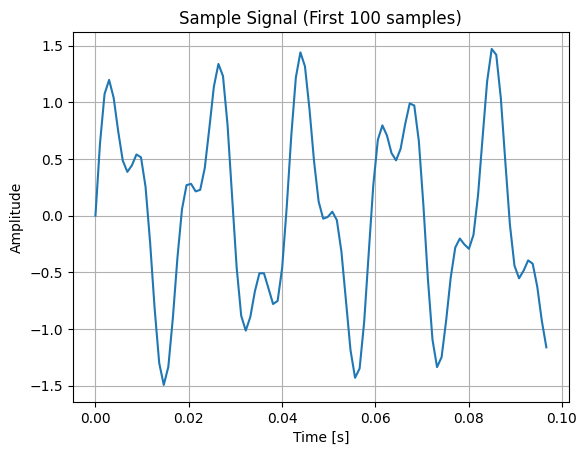

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Sampling parameters
N = 512          # Number of samples
Fs = 1024        # Sampling frequency (Hz)
T = 1 / Fs       # Sampling interval
t = np.arange(N) * T

# Composite signal: 50Hz + 120Hz
f1, f2 = 50, 120
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Plot the signal
plt.plot(t[:100], signal[:100])
plt.title("Sample Signal (First 100 samples)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [3]:

def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X


def fft(x):
    N = len(x)
    if N <= 1:
        return x
    if N % 2 != 0:
        raise ValueError("N must be a power of 2")
    
    even = fft(x[::2])
    odd = fft(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + \
           [even[k] - T[k] for k in range(N // 2)]


def benchmark(method, x, label):
    start = time.time()
    result = method(x)
    end = time.time()
    print(f"{label} took {(end - start)*1000:.2f} ms")
    return np.array(result)

# Benchmark all methods
X_dft = benchmark(dft, signal, "Manual DFT")
X_fft = benchmark(fft, signal, "Manual FFT")
X_np_fft = benchmark(np.fft.fft, signal, "NumPy FFT")

Manual DFT took 1151.60 ms
Manual FFT took 11.75 ms
NumPy FFT took 1.18 ms


### Spectrum

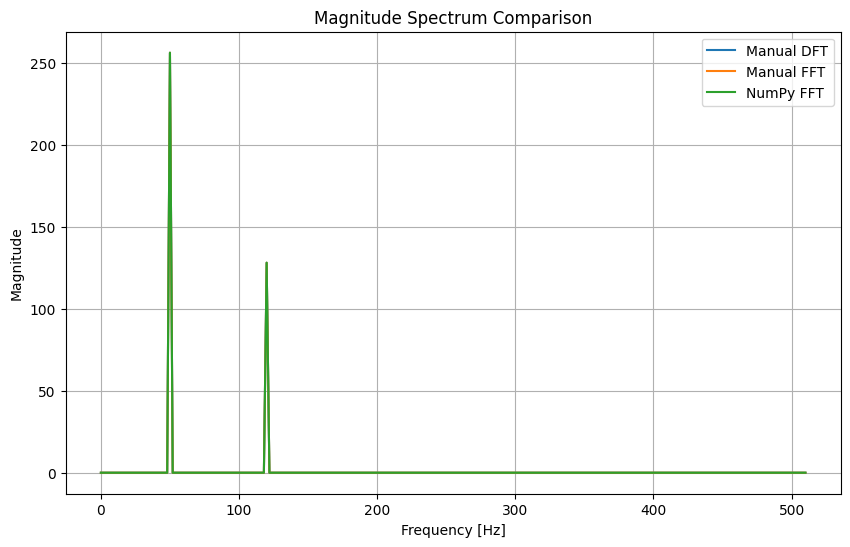

In [ ]:
def plot_spectrum(X, label):
    N = len(X)
    f = np.fft.fftfreq(N, d=1/Fs)
    plt.plot(f[:N//2], np.abs(X[:N//2]), label=label)

plt.figure(figsize=(10, 6))
plot_spectrum(X_dft, "Manual DFT")
plot_spectrum(X_fft, "Manual FFT")
plot_spectrum(X_np_fft, "NumPy FFT")
plt.title("Magnitude Spectrum Comparison")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()

In [5]:

def mean_squared_error(a, b):
    return np.mean(np.abs(a - b) ** 2)

print(f"MSE (DFT vs NumPy FFT): {mean_squared_error(X_dft, X_np_fft):.4e}")
print(f"MSE (FFT vs NumPy FFT): {mean_squared_error(X_fft, X_np_fft):.4e}")

MSE (DFT vs NumPy FFT): 3.5747e-24
MSE (FFT vs NumPy FFT): 5.1588e-29


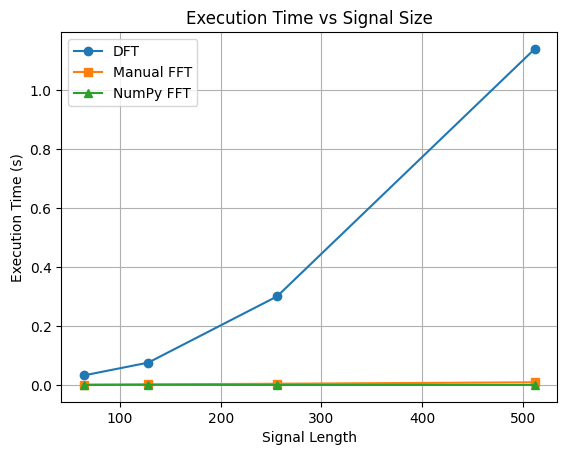

In [6]:
sizes = [64, 128, 256, 512]
times_dft = []
times_fft = []
times_np_fft = []

for N in sizes:
    t = np.arange(N) / Fs
    sig = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)
    
    t1 = time.time()
    dft(sig)
    times_dft.append(time.time() - t1)
    
    t2 = time.time()
    fft(sig)
    times_fft.append(time.time() - t2)
    
    t3 = time.time()
    np.fft.fft(sig)
    times_np_fft.append(time.time() - t3)

plt.plot(sizes, times_dft, 'o-', label="DFT")
plt.plot(sizes, times_fft, 's-', label="Manual FFT")
plt.plot(sizes, times_np_fft, '^-', label="NumPy FFT")
plt.xlabel("Signal Length")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Signal Size")
plt.legend()
plt.grid(True)
plt.show()

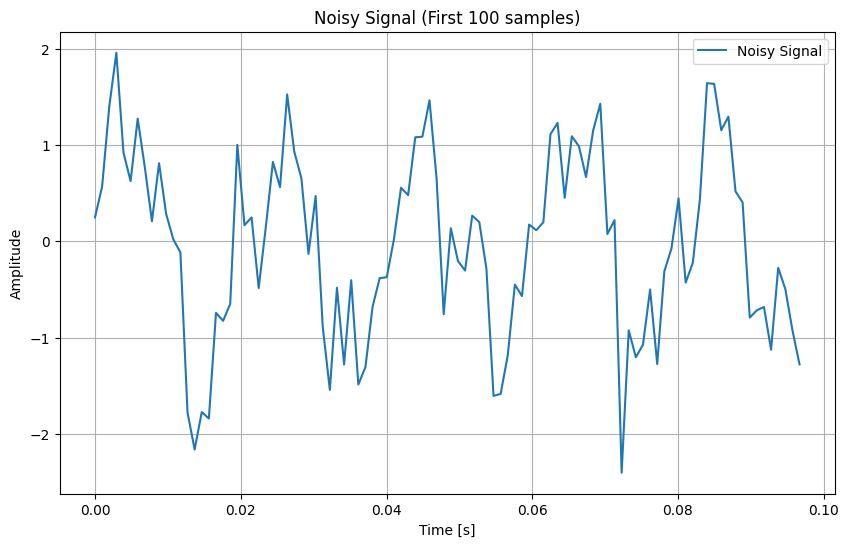

Manual DFT (Noisy) took 1320.29 ms
Manual FFT (Noisy) took 10.01 ms
NumPy FFT (Noisy) took 0.11 ms


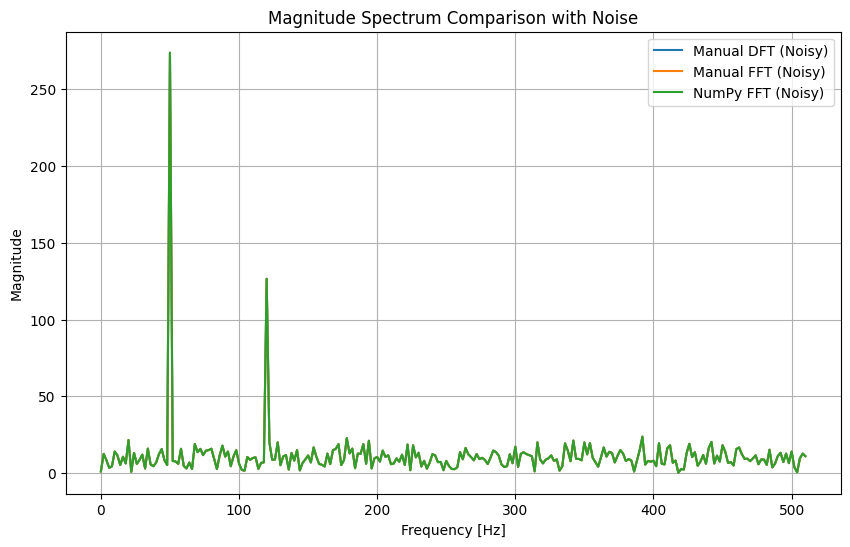

MSE (Noisy DFT vs NumPy FFT): 4.8525e-24
MSE (Noisy FFT vs NumPy FFT): 6.4894e-29


In [ ]:

# Set random seed for reproducibility
np.random.seed(42)

# Add Gaussian noise to the original signal (mean=0, std=0.5)
noise_std = 0.5
noisy_signal = signal + np.random.normal(0, noise_std, N)

# Plot the noisy signal (first 100 samples)
plt.figure(figsize=(10, 6))
plt.plot(t[:100], noisy_signal[:100], label="Noisy Signal") 
plt.title("Noisy Signal (First 100 samples)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Apply the DFT, FFT, and NumPy FFT to the noisy signal
X_dft_noisy = benchmark(dft, noisy_signal, "Manual DFT (Noisy)")
X_fft_noisy = benchmark(fft, noisy_signal, "Manual FFT (Noisy)")
X_np_fft_noisy = benchmark(np.fft.fft, noisy_signal, "NumPy FFT (Noisy)")

# Visualize the frequency spectrum of the noisy signal
plt.figure(figsize=(10, 6))
plot_spectrum(X_dft_noisy, "Manual DFT (Noisy)")
plot_spectrum(X_fft_noisy, "Manual FFT (Noisy)")
plot_spectrum(X_np_fft_noisy, "NumPy FFT (Noisy)")
plt.title("Magnitude Spectrum Comparison with Noise")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print MSE between noisy methods and NumPy FFT
print(f"MSE (Noisy DFT vs NumPy FFT): {mean_squared_error(X_dft_noisy, X_np_fft_noisy):.4e}")
print(f"MSE (Noisy FFT vs NumPy FFT): {mean_squared_error(X_fft_noisy, X_np_fft_noisy):.4e}")